In [1]:
import numpy as np
import pandas as pd

# to-do: add today via datetime.

done_movies = [
    'arcane',
    'dune',
    'eternals',
    'my hero academia',
    'no time to die',
    'shang-chi',
    'squid game'
]

tweet_df = pd.DataFrame([])

for movie in done_movies:
    metadata_df = pd.read_json('../dataset/movie-tweets/'+movie+'.json', orient='index')
    is_spam_df = pd.read_excel('../dataset/movie-tweets/'+movie+'-label.xlsx')
    joined_df = pd.concat([metadata_df, is_spam_df], axis=1).drop(['Unnamed: 0', 'tweet'], axis=1)
    tweet_df = tweet_df.append(joined_df).reset_index().drop('index', axis=1)

In [2]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,inferred_text,is-spam
0,2021-11-25 01:16:10+00:00,1463677861764681729,1463677861764681728,RT @yungm3dusa: My Mel Medarda cosplay 🖤 i’m s...,False,"[0, 102]","{'hashtags': [{'text': 'arcane', 'indices': [7...","{'media': [{'id': 1463627942358097923, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,en,NaN,NaN,None,My Mel Medarda cosplay 🖤 i’m still not over th...,0
1,2021-11-25 01:16:10+00:00,1463677860263120897,1463677860263120896,RT @Snegovski9623: Made a smol gif with my fav...,False,"[0, 108]","{'hashtags': [{'text': 'Arcane', 'indices': [6...","{'media': [{'id': 1463461643833200645, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,0.0,en,NaN,NaN,None,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,0
2,2021-11-25 01:16:08+00:00,1463677853245919232,1463677853245919232,RT @Meshymayhem: More practice\nhomies I still...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,NaN,en,NaN,NaN,None,More practice\nhomies I still hate doing full ...,0
3,2021-11-25 01:16:06+00:00,1463677843812929536,1463677843812929536,RT @treker402: Right at it again. \n\n#Arcane ...,False,"[0, 84]","{'hashtags': [{'text': 'Arcane', 'indices': [3...","{'media': [{'id': 1463499779409793033, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,en,NaN,NaN,None,Right at it again. \n\n#Arcane #piltoversfines...,0
4,2021-11-25 01:16:05+00:00,1463677841900556290,1463677841900556288,self proclaimed free thinkers when arcane jinx...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1463676826291740674, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,0.0,en,NaN,NaN,None,self proclaimed free thinkers when arcane jinx...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,2021-11-25 00:37:56+00:00,1463668239616073732,1463668239616073728,"$456,000 Squid Game In Real Life! https://t.co...",False,"[0, 70]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,en,NaN,NaN,None,"$456,000 Squid Game In Real Life! https://t.co...",0
4153,2021-11-25 00:37:51+00:00,1463668219055468546,1463668219055468544,squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...,False,"[0, 24]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1463668178740035592, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,0.0,en,NaN,NaN,None,squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...,0
4154,2021-11-25 00:37:50+00:00,1463668212638183429,1463668212638183424,"he literally spent abt 3,5 mill to recreate sq...",False,"[0, 83]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1463668094702809089, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,0.0,en,NaN,NaN,None,"he literally spent abt 3,5 mill to recreate sq...",0
4155,2021-11-25 00:37:37+00:00,1463668160956145665,1463668160956145664,I HQVENT WATCHED MR BEASTS SQUID GAME VIDEO YE...,False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitte

Things need to be opened:
1. entities -> opened
2. extended_entities -> opened (if any)
3. metadata -> opened
4. user -> opened

In [3]:
# Nested opener
open_candidate = [
    'entities',
    'extended_entities',
    'metadata',
    'user'
]

for attr in open_candidate:
    attr_opened = tweet_df.get(attr).apply(pd.Series).add_prefix(attr+'_')
    tweet_df = pd.concat([tweet_df, attr_opened], axis=1).drop(attr, axis=1)

In [4]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries
0,2021-11-25 01:16:10+00:00,1463677861764681729,1463677861764681728,RT @yungm3dusa: My Mel Medarda cosplay 🖤 i’m s...,False,"[0, 102]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,False,True,False,False,None,None,None,none,[]
1,2021-11-25 01:16:10+00:00,1463677860263120897,1463677860263120896,RT @Snegovski9623: Made a smol gif with my fav...,False,"[0, 108]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,000000,False,True,False,False,None,None,None,none,[]
2,2021-11-25 01:16:08+00:00,1463677853245919232,1463677853245919232,RT @Meshymayhem: More practice\nhomies I still...,False,"[0, 139]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
3,2021-11-25 01:16:06+00:00,1463677843812929536,1463677843812929536,RT @treker402: Right at it again. \n\n#Arcane ...,False,"[0, 84]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
4,2021-11-25 01:16:05+00:00,1463677841900556290,1463677841900556288,self proclaimed free thinkers when arcane jinx...,False,"[0, 54]","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.463677e+18,1.463677e+18,1.316974e+18,...,333333,True,True,True,False,None,None,None,none,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,2021-11-25 00:37:56+00:00,1463668239616073732,1463668239616073728,"$456,000 Squid Game In Real Life! https://t.co...",False,"[0, 70]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
4153,2021-11-25 00:37:51+00:00,1463668219055468546,1463668219055468544,squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...,False,"[0, 24]","<a href=""http://twitter.com/download/android"" ...",1.463668e+18,1.463668e+18,1.318954e+18,...,333333,True,True,True,False,None,None,None,none,[]
4154,2021-11-25 00:37:50+00:00,1463668212638183429,1463668212638183424,"he literally spent abt 3,5 mill to recreate sq...",False,"[0, 83]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
4155,2021-11-25 00:37:37+00:00,1463668160956145665,1463668160956145664,I HQVENT WATCHED MR BEASTS SQUID GAME VIDEO YE...,False,"[0, 52]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]


Temporary verdict:
1. entities_hashtags -> hashtag_count (actual hashtags are calculated in text preprocessing)
2. entities_user_mentions -> user_mention_count (usernames aren't important)
3. entities_media -> media_count (same as 2)
4. retweeted_status_user -> open

delete:
1. created_at
2. id
3. id_str
4. full_text,
5. truncated,
6. source',
7. lang (obv its en)
8. quoted_status_id_str
9. in_reply_to_status_id_str', #dup
10. in_reply_to_user_id_str', #dup
11. in_reply_to_screen_name' #redundant
12. extended_entities_media (redundant)
13. metadata_iso_language_code (of course all is en, we put it as a criteria on our earlier tweet search
14. metadata_result_type (all recent, I do not have the historic privilege yet)
15. user_entities (duplicate of user_description and user_url)
16. retweeted_status_* (possible duplicate)

n.b. careful of text stuff vs tabular, the former should be resolved in a recurrent manner while the rest can just be forwarded to SVM and other ML models

In [5]:
tweet_df.describe(include='all')

C:\Users\vin\AppData\Local\Temp/ipykernel_6668/522420988.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_df.describe(include='all')


,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries
count,4157,4.157000e+03,4.157000e+03,4157,4157,4157,4157,1.106000e+03,1.106000e+03,1.140000e+03,...,4157,4157,4157,4157,4157,0,0,0,4157,4157
unique,3618,NaN,NaN,4129,1,1083,97,NaN,NaN,NaN,...,123,2,2,2,2,0,0,0,2,1
top,2021-11-25 00:46:31+00:00,NaN,NaN,@Respexy @FantasyFan13 @AnaMardoll I’m vaccina...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,NaN,NaN,NaN,none,[]
freq,6,NaN,NaN,3,4157,470,1725,NaN,NaN,NaN,...,3192,3537,2949,2767,4099,NaN,NaN,NaN,4114,4157
first,2021-11-24 04:42:34+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-11-25 01:16:10+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.463612e+18,1.463612e+18,NaN,NaN,NaN,NaN,1.462936e+18,1.462936e+18,6.515263e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.691322e+13,7.691322e+13,NaN,NaN,NaN,NaN,7.854829e+15,7.854829e+15,5.790371e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.463367e+18,1.463367e+18,NaN,NaN,NaN,NaN,1.246182e+18,1.246182e+18,7.421430e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.463563e+18,1.463563e+18,NaN,NaN,NaN,NaN,1.463508e+18,1.463508e+18,6.052811e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(tweet_df.columns)
# Verdict: drop these clear attr:
drop_cand = [
    'created_at',
    'id',
    'id_str',
    'full_text',
    'truncated',
    'source',
    'lang',
    'quoted_status_id_str',
    'extended_entities_media',
    'metadata_iso_language_code',
    'metadata_result_type',
    'user_entities',
    'retweeted_status',
    'in_reply_to_status_id_str', #dup
    'in_reply_to_user_id_str', #dup
    'in_reply_to_screen_name', #redundant
    'in_reply_to_user_id',
    'user_id',
    'user_id_str',
    'user_screen_name',
    'user_url',
    'user_utc_offset',
    'user_time_zone',
    'user_lang',
    'user_profile_background_image_url',
    'user_profile_background_image_url_https',
    'user_profile_image_url',
    'user_profile_image_url_https',
    'user_profile_banner_url',
    'geo',
    'coordinates',
    'contributors',
    'place',
    'user_withheld_in_countries',
    'user_following',
    'user_follow_request_sent',
    'user_notifications'
]

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'inferred_text', 'is-spam',
       'entities_hashtags', 'entities_symbols', 'entities_user_mentions',
       'entities_urls', 'entities_media', 'extended_entities_media',
       'metadata_iso_language_code', 'metadata_result_type', 'user_id',
       'user_id_str', 'user_name', 'user_screen_name', 'user_location',
       'user_description', 'user_url', 'user_entities', 'user_protected',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at'

In [7]:
tweet_df.drop(drop_cand, axis=1, inplace=True)

In [8]:
tweet_df

,display_text_range,in_reply_to_status_id,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,quoted_status_id,quoted_status,...,user_profile_background_tile,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_translator_type
0,"[0, 102]",NaN,False,247,0,False,False,0.0,NaN,None,...,False,19CF86,000000,000000,000000,False,True,False,False,none
1,"[0, 108]",NaN,False,2543,0,False,False,0.0,NaN,None,...,False,981CEB,000000,000000,000000,False,True,False,False,none
2,"[0, 139]",NaN,False,816,0,False,False,NaN,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
3,"[0, 84]",NaN,False,2687,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
4,"[0, 54]",1.463677e+18,False,0,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,"[0, 70]",NaN,False,0,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
4153,"[0, 24]",1.463668e+18,False,0,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
4154,"[0, 83]",NaN,False,0,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
4155,"[0, 52]",NaN,False,0,0,False,False,NaN,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none


Things need to be changed:
1. display_text_range -> integer
2. in_reply_to_status_id -> is_replying_to_others (bool)
3. quoted_status_id -> is_quoting_status (bool)
4. entities_hashtags -> hashtag_count (int)
5. entities_user_mentions -> user_mention_count (int)
6. entities_media -> media_count
---
7. user_created_at -> age (int, in days subtracted to the scraping date which is 25th November 2021)
8. user_profile_background_color -> rgb (float/quantised)
9. user_profile_link_color -> rgb (float/quantised)
10. user_profile_sidebar_border_color -> rgb (float/quantised)
11. user_profile_sidebar_fill_color -> rgb (float/quantised)
12. user_profile_text_color -> rgb (float/quantised)

In [9]:
# Simple transformations
tweet_df['display_text_range'] = [i[1] - i[0] for i in tweet_df['display_text_range']]
tweet_df['is_replying_to_others'] = [1.0 if not np.isnan(i) else 0.0 for i in tweet_df['in_reply_to_status_id']]
tweet_df['is_quoting_status'] = [1.0 if not np.isnan(i) else 0.0 for i in tweet_df['quoted_status_id']]
tweet_df['hashtag_count'] = [len(i) for i in tweet_df['entities_hashtags']]
tweet_df['user_mention_count'] = [len(i) for i in tweet_df['entities_user_mentions']]
tweet_df['media_count'] = [0 if pd.isnull(i) else len(i) for i in tweet_df['entities_media']]
tweet_df['has_symbols'] = [1.0 if i else 0.0 for i in tweet_df['entities_symbols'].astype(bool)]
tweet_df['has_url'] = [1.0 if i else 0.0 for i in tweet_df['entities_urls'].astype(bool)]
tweet_df['user_is_regular_translator'] = [1.0 if i == 'regular' else 0.0 for i in tweet_df['user_translator_type']]

In [10]:
# Drop previous attr
tweet_df.drop(['display_text_range', 'in_reply_to_status_id', 'quoted_status_id', 'entities_hashtags', 'entities_user_mentions', 'entities_media', 'entities_symbols', 'entities_urls', 'quoted_status', 'favorited', 'retweeted', 'user_protected', 'user_contributors_enabled', 'user_is_translator', 'user_translator_type'], axis=1, inplace=True)

In [11]:
tweet_df['user_profile_background_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 0]
tweet_df['user_profile_background_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 1]
tweet_df['user_profile_background_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 2]
tweet_df['user_profile_link_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 0]
tweet_df['user_profile_link_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 1]
tweet_df['user_profile_link_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 2]
tweet_df['user_profile_sidebar_border_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 0]
tweet_df['user_profile_sidebar_border_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 1]
tweet_df['user_profile_sidebar_border_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 2]
tweet_df['user_profile_sidebar_fill_color_r'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 0]
tweet_df['user_profile_sidebar_fill_color_g'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 1]
tweet_df['user_profile_sidebar_fill_color_b'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 2]
tweet_df['user_profile_text_color_r'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 0]
tweet_df['user_profile_text_color_g'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 1]
tweet_df['user_profile_text_color_b'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 2]

In [12]:
tweet_df.drop(['user_profile_background_color', 'user_profile_link_color', 'user_profile_sidebar_border_color', 'user_profile_sidebar_fill_color', 'user_profile_text_color'], axis=1, inplace=True)

null analysis:
1. geo
2. coordinates
3. place
4. contributors

value analysis:
1. is_quote_status
2. favorited
3. retweeted
4. possibly_sensitive
5. entities_symbols
6. entities_urls
7. user_protected
8. user_geo_enabled
9. user_verified
10. user_contributors_enabled
11. user_is_translator
12. user_is_translation_enabled
13. user_profile_background_tile
and so much more

In [13]:
tweet_df.describe(include='all')

,is_quote_status,retweet_count,favorite_count,possibly_sensitive,inferred_text,is-spam,user_name,user_location,user_description,user_followers_count,...,user_profile_link_color_b,user_profile_sidebar_border_color_r,user_profile_sidebar_border_color_g,user_profile_sidebar_border_color_b,user_profile_sidebar_fill_color_r,user_profile_sidebar_fill_color_g,user_profile_sidebar_fill_color_b,user_profile_text_color_r,user_profile_text_color_g,user_profile_text_color_b
count,4157,4157.000000,4157.000000,1562.000000,4157,4157.000000,4157,4157,4157,4157.000000,...,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
unique,2,NaN,NaN,NaN,4130,NaN,3671,2064,3399,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,@Respexy @FantasyFan13 @AnaMardoll I’m vaccina...,NaN,iceage86,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3772,NaN,NaN,NaN,3,NaN,15,1226,367,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,252.447679,0.732499,0.026889,NaN,0.023094,NaN,NaN,NaN,2024.179456,...,208.064951,160.495550,181.416166,191.132307,181.847005,195.410152,199.914842,46.001924,45.098629,45.365167
std,NaN,1866.864822,3.130255,0.161810,NaN,0.150219,NaN,NaN,NaN,15115.968143,...,66.849439,79.508729,88.285264,93.471565,82.914460,89.005723,92.287312,27.818918,25.623475,26.282200
min,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,66.000000,...,208.000000,192.000000,222.000000,237.000000,221.000000,238.000000,239.000000,51.000000,51.000000,51.000000
50%,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,277.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000
75%,NaN,2.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,907.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000


In [14]:
tweet_df.describe()

,retweet_count,favorite_count,possibly_sensitive,is-spam,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,is_replying_to_others,...,user_profile_link_color_b,user_profile_sidebar_border_color_r,user_profile_sidebar_border_color_g,user_profile_sidebar_border_color_b,user_profile_sidebar_fill_color_r,user_profile_sidebar_fill_color_g,user_profile_sidebar_fill_color_b,user_profile_text_color_r,user_profile_text_color_g,user_profile_text_color_b
count,4157.000000,4157.000000,1562.000000,4157.000000,4157.000000,4157.000000,4157.000000,4.157000e+03,4.157000e+03,4157.000000,...,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,252.447679,0.732499,0.026889,0.023094,2024.179456,959.470051,31.644936,3.619683e+04,3.735644e+04,0.266057,...,208.064951,160.495550,181.416166,191.132307,181.847005,195.410152,199.914842,46.001924,45.098629,45.365167
std,1866.864822,3.130255,0.161810,0.150219,15115.968143,2636.491313,305.382014,6.696890e+04,1.131422e+05,0.441948,...,66.849439,79.508729,88.285264,93.471565,82.914460,89.005723,92.287312,27.818918,25.623475,26.282200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,66.000000,166.000000,0.000000,2.219000e+03,2.097000e+03,0.000000,...,208.000000,192.000000,222.000000,237.000000,221.000000,238.000000,239.000000,51.000000,51.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,277.000000,428.000000,2.000000,1.255000e+04,9.710000e+03,0.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000
75%,2.000000,1.000000,0.000000,0.000000,907.000000,960.000000,10.000000,4.120000e+04,3.376900e+04,1.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000
max,60854.000000,128.000000,1.000000,1.000000,458641.000000,128168.000000,11724.000000,1.343217e+06,3.033024e+06,1.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Verdict: we still have null values on possibly_sensitive and quoted_status.

In [15]:
tweet_df.isnull().any()

is_quote_status                        False
retweet_count                          False
favorite_count                         False
possibly_sensitive                      True
inferred_text                          False
is-spam                                False
user_name                              False
user_location                          False
user_description                       False
user_followers_count                   False
user_friends_count                     False
user_listed_count                      False
user_created_at                        False
user_favourites_count                  False
user_geo_enabled                       False
user_verified                          False
user_statuses_count                    False
user_is_translation_enabled            False
user_profile_background_tile           False
user_profile_use_background_image      False
user_has_extended_profile              False
user_default_profile                   False
user_defau

In [16]:
tweet_df

,is_quote_status,retweet_count,favorite_count,possibly_sensitive,inferred_text,is-spam,user_name,user_location,user_description,user_followers_count,...,user_profile_link_color_b,user_profile_sidebar_border_color_r,user_profile_sidebar_border_color_g,user_profile_sidebar_border_color_b,user_profile_sidebar_fill_color_r,user_profile_sidebar_fill_color_g,user_profile_sidebar_fill_color_b,user_profile_text_color_r,user_profile_text_color_g,user_profile_text_color_b
0,False,247,0,0.0,My Mel Medarda cosplay 🖤 i’m still not over th...,0,Detavius,"Wherever Shego, I go",Owner of the the Dimmsdale Demon Time Dimmadome,1452,...,134,0,0,0,0,0,0,0,0,0
1,False,2543,0,0.0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,0,Cristiano #ARCANE SPOILERS,"Rancharia, Brasil",Design - Bauru\n\nIlustrador \n\nhttps://t.co/...,176,...,235,0,0,0,0,0,0,0,0,0
2,False,816,0,NaN,More practice\nhomies I still hate doing full ...,0,Mizi-deloafu🥖,In your Fantazi,Digital multi-fandom artist/fan-artist \nInter...,48,...,242,192,222,237,221,238,246,51,51,51
3,False,2687,0,0.0,Right at it again. \n\n#Arcane #piltoversfines...,0,𝐚𝐣𝐚𝐱 𖤐,lesbian - 19 - they/them,𝘨𝘪𝘳𝘭 𝘨𝘳𝘰𝘶𝘱 𝘦𝘯𝘵𝘩𝘶𝘴𝘪𝘢𝘴𝘵! 💘 𝘰𝘯𝘤𝘦𝘮𝘪𝘥𝘻𝘺𝘪𝘯𝘴𝘰𝘮𝘯𝘪𝘢𝘤𝘰𝘳𝘣...,21,...,242,192,222,237,221,238,246,51,51,51
4,False,0,0,0.0,self proclaimed free thinkers when arcane jinx...,0,Zhyxx,He/Him 17,~Good night~\ni play games\nEsp/Eng\n\npfp: @/...,155,...,242,192,222,237,221,238,246,51,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,False,0,0,0.0,"$456,000 Squid Game In Real Life! https://t.co...",0,Much_Mining,USA,Tax Paying USA Cryptocurrency Farmer. I decide...,10,...,242,192,222,237,221,238,246,51,51,51
4153,False,0,0,0.0,squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...,0,cami,𓇚,6. come as you are ͏͏͏͏ ͏͏͏͏͏͏͏ ͏͏͏͏͏͏͏ ͏͏͏ ͏͏...,65,...,242,192,222,237,221,238,246,51,51,51
4154,False,0,0,0.0,"he literally spent abt 3,5 mill to recreate sq...",0,pramski is fully vaccinated,,"journal, diary, and opinion. i tweet 100x a da...",100,...,242,192,222,237,221,238,246,51,51,51
4155,False,0,0,NaN,I HQVENT WATCHED MR BEASTS SQUID GAME VIDEO YE...,0,ari is in love w abel,SHE HER ࿐ྂ,i tweet a lot,1507,...,242,192,222,237,221,238,246,51,51,51


In [17]:
numeric_df = tweet_df.drop(['inferred_text', 'user_name', 'user_location', 'user_description'], axis=1)
numeric_df.drop('user_created_at', axis=1, inplace=True) # needs further preprocessing
numeric_df.drop('possibly_sensitive', axis=1, inplace=True) # needs imputation from tweets first.

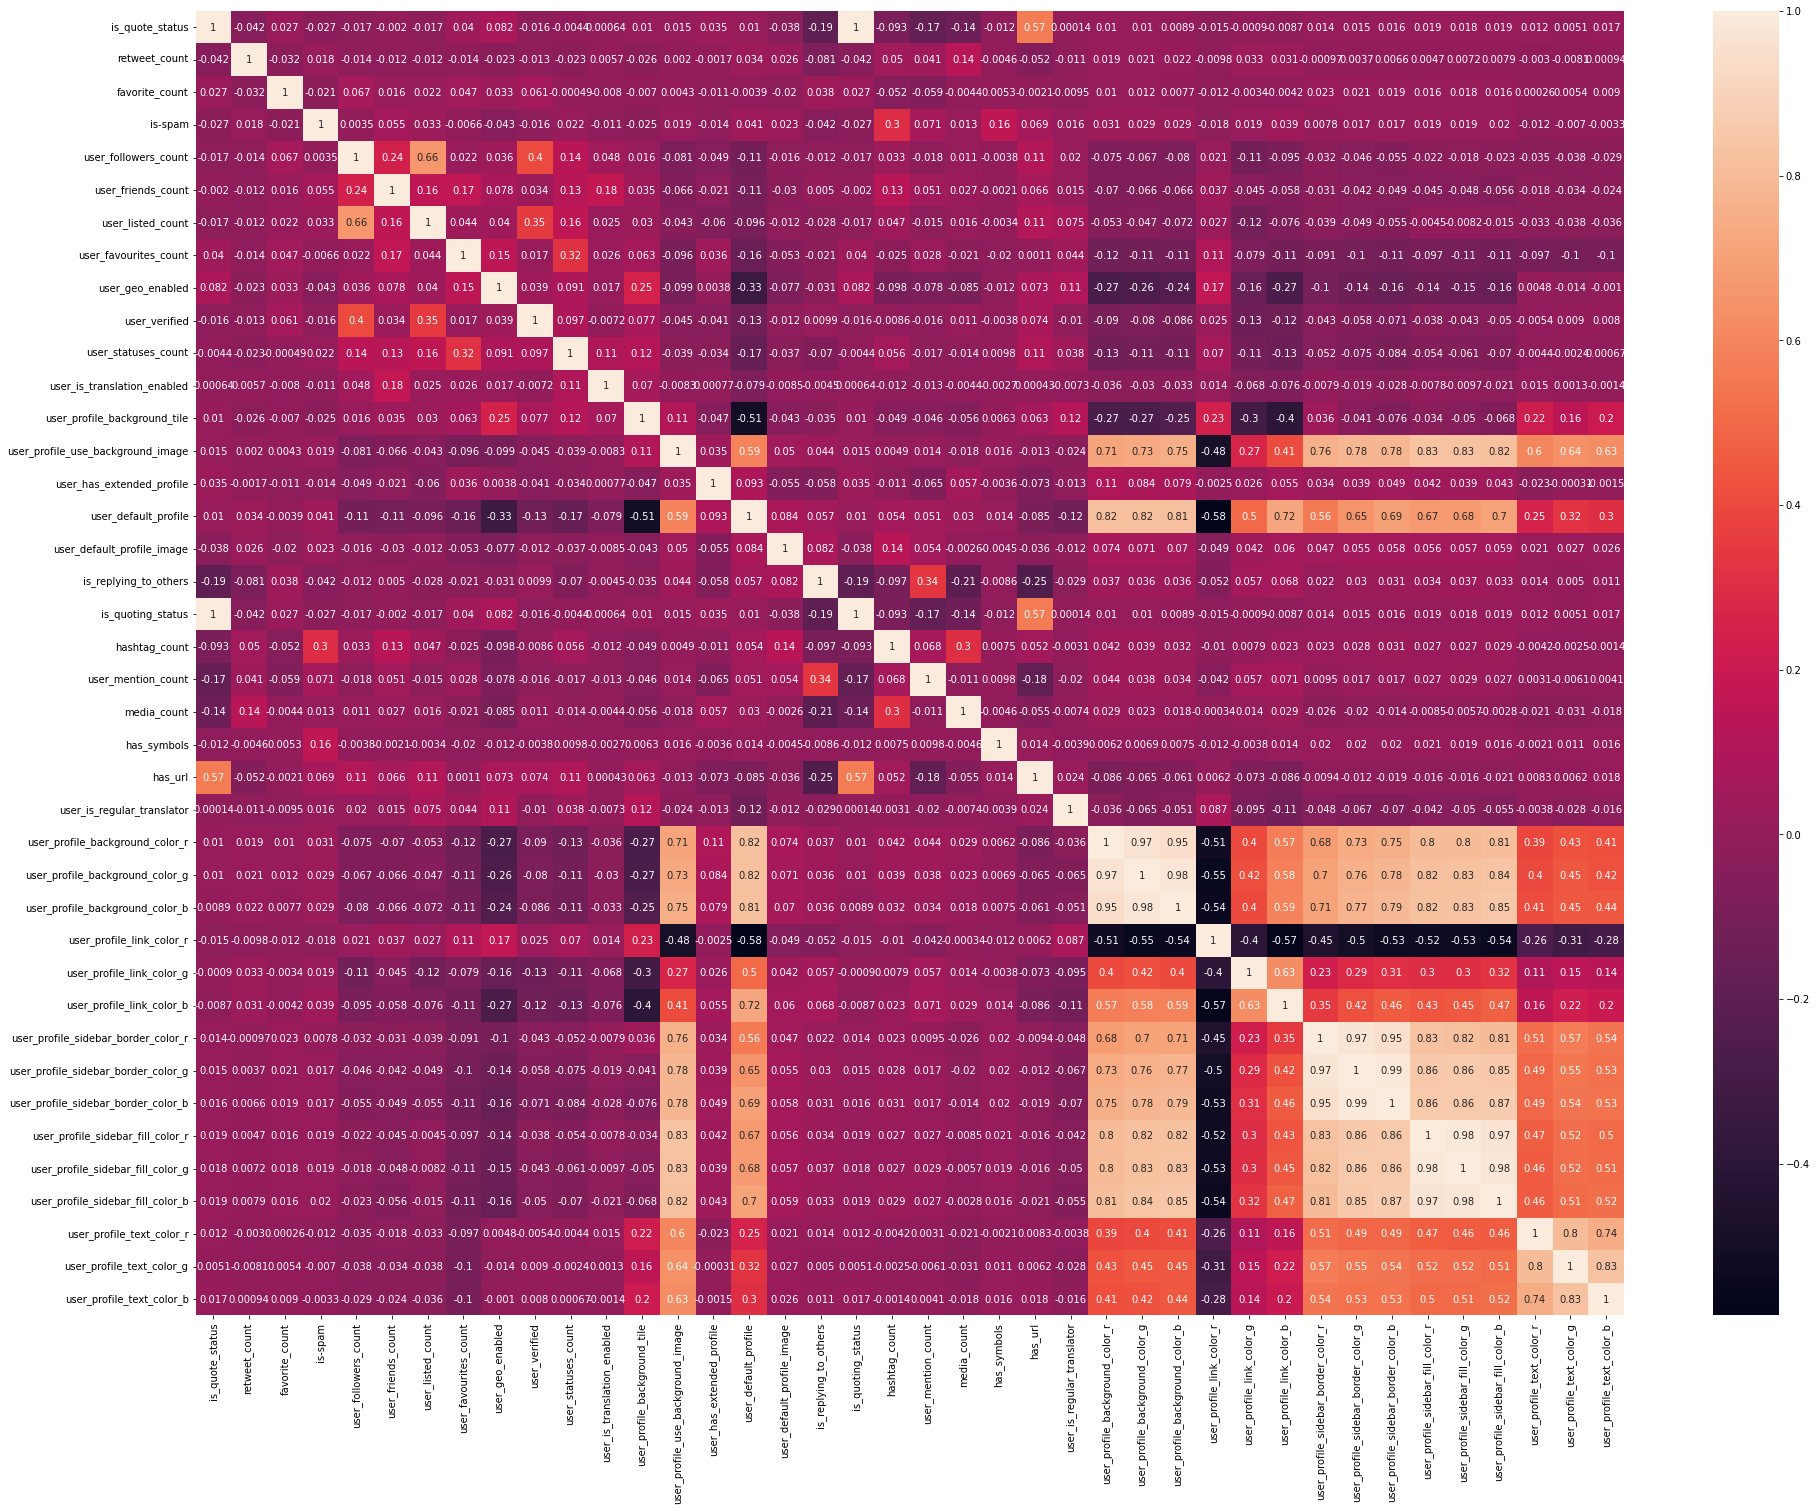

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(32,24))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

To-do:
1. Impute possibly_sensitive from tweet texts

In [19]:
numeric_df.isnull().any()

is_quote_status                        False
retweet_count                          False
favorite_count                         False
is-spam                                False
user_followers_count                   False
user_friends_count                     False
user_listed_count                      False
user_favourites_count                  False
user_geo_enabled                       False
user_verified                          False
user_statuses_count                    False
user_is_translation_enabled            False
user_profile_background_tile           False
user_profile_use_background_image      False
user_has_extended_profile              False
user_default_profile                   False
user_default_profile_image             False
is_replying_to_others                  False
is_quoting_status                      False
hashtag_count                          False
user_mention_count                     False
media_count                            False
has_symbol

In [20]:
# Trying to insert Random Forest algorithm to the data to see which one matters more.
predictors = numeric_df.drop('is-spam', axis=1)
target = numeric_df['is-spam']

from sklearn.ensemble import ExtraTreesClassifier

tree_classifier = ExtraTreesClassifier(n_estimators=50)
tree_classifier = tree_classifier.fit(predictors, target)

In [21]:
tree_classifier.feature_importances_

array([5.35194154e-03, 8.53844226e-02, 2.18003470e-02, 9.93907529e-02,
       1.09419217e-01, 7.15666891e-02, 8.06618101e-02, 1.12130196e-02,
       4.30166372e-04, 9.53690444e-02, 5.61551835e-05, 2.77184278e-03,
       1.70450945e-03, 2.25389310e-02, 3.77906356e-03, 4.08055106e-03,
       1.19121701e-02, 5.18796627e-03, 1.47558584e-01, 5.91511377e-02,
       2.10968920e-02, 3.15367641e-02, 1.68554087e-02, 3.09359451e-03,
       8.33305177e-03, 1.05301436e-02, 9.43368839e-03, 1.09933001e-02,
       8.60761492e-03, 1.31687036e-02, 2.73789720e-03, 3.11426563e-03,
       3.15556926e-03, 4.81740625e-03, 3.25218122e-03, 4.33758312e-03,
       2.22339421e-03, 1.74239824e-03, 1.64182174e-03])

In [22]:
feature_importance_df = pd.DataFrame({
    'feature': predictors.columns,
    'importance': tree_classifier.feature_importances_
})

In [33]:
best_features = feature_importance_df.nlargest(16, 'importance')
best_features.drop(29, inplace=True)
best_features

,feature,importance
18,hashtag_count,0.147559
4,user_friends_count,0.109419
3,user_followers_count,0.099391
9,user_statuses_count,0.095369
1,retweet_count,0.085384
6,user_favourites_count,0.080662
5,user_listed_count,0.071567
19,user_mention_count,0.059151
21,has_symbols,0.031537
13,user_has_extended_profile,0.022539


Verdict: the following attributes are the best candidates for features:
1. Hashtag count
2. User friends count
3. User followers count
4. User statuses count
5. Retweet count
6. User favourites count
7. User listed count
8. User mention count
9. Has symbols
10. User has extended profile
11. Favourites count
12. Media count
13. Has url
14. Is replying to others
15. User geo enabled

In [25]:
# Further processing via Orange
numeric_df.to_csv('../dataset/numeric-dataset.csv')
tweet_df.to_json('../dataset/tweet-selected.json', orient="index")

Continuing from sensitive-content-imputer:
> Verdict: none of the tweets tagged with 'possibly sensitive' is sensitive.

Continuing as usual.

## Natural language processing
The following cells onward tries to process texts.

In [239]:
tweets = tweet_df[['is-spam', 'inferred_text']].rename({'inferred_text': 'raw_text'}, axis=1)
tweets.head()

,is-spam,raw_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...
2,0,More practice\nhomies I still hate doing full ...
3,0,Right at it again. \n\n#Arcane #piltoversfines...
4,0,self proclaimed free thinkers when arcane jinx...


In [75]:
import nltk
import string
import re

'!"#$%&\'()*+,-./:;=?@[\\]^_`{|}~'

In [64]:
# Uncomment this if NLTK had not been downloaded yet
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [267]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [271]:
punctuation_gensim = re.sub('([.,?!])','', string.punctuation)
punctuation_gensim

'"#$%&\'()*+-/:;<=>@[\\]^_`{|}~'

In [272]:
# 1st: remove Twitter quirks.
def remove_twitter(text, for_gensim = False):
    twitter_stripped_text = re.sub('(\@[A-Za-z0-9_]+)', '', text)   # Username removal
    twitter_stripped_text = re.sub(r'([http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*))', '', twitter_stripped_text)   # Link removal
    twitter_stripped_text = re.sub('(\#[A-Za-z]+)', '', twitter_stripped_text) if for_gensim else re.sub('(\#)', ' ', twitter_stripped_text)  # Hashtag removal, but preserving the word
    twitter_stripped_text = re.sub('([-&])', ' ', twitter_stripped_text)   # dash spacing, accommodating for better representation in spams
    return twitter_stripped_text

tweets['clean_text'] = tweets['raw_text'].apply(lambda x: remove_twitter(x))
tweets['clean_text_gensim'] = tweets['raw_text'].apply(lambda x: remove_twitter(x, for_gensim=True))
tweets.head()

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay 🖤 i’m still not over th...,"[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, 'm, still, show, a..."
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,Made a smol gif with my fav cupcakes🧁💜❤️\n Arc...,Made a smol gif with my fav cupcakes🧁💜❤️\n,"[Made, a, smol, gif, with, my, fav, cupcakes, ...","[Made, a, smol, gif, with, my, fav, cupcakes]","[Made, smol, gif, fav, cupcakes, Arcane, pilto..."
2,0,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,"[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, full,..."
3,0,Right at it again. \n\n#Arcane #piltoversfines...,Right at it again. \n\n Arcane piltoversfinest,Right at it again. \n\n,"[Right, at, it, again, Arcane, piltoversfinest]","[Right, at, it, again]","[Right, Arcane, piltoversfinest]"
4,0,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,"[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, arcane, jin..."


In [273]:
# 2nd: remove punctuation
def remove_punctuation(text, for_gensim=False):
    clean_text = "".join([i for i in text if i not in punctuation_gensim]) if for_gensim else "".join([i for i in text if i not in string.punctuation])
    clean_text = re.sub('([’])', "'", clean_text)
    return clean_text

tweets['clean_text'] = tweets['clean_text'].apply(lambda x: remove_punctuation(x))
tweets['clean_text_gensim'] = tweets['clean_text_gensim'].apply(lambda x: remove_punctuation(x, for_gensim=True))
tweets.head()

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay 🖤 i'm still not over th...,My Mel Medarda cosplay 🖤 i'm still not over th...,"[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, 'm, still, show, a..."
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,Made a smol gif with my fav cupcakes🧁💜❤️\n Arc...,Made a smol gif with my fav cupcakes🧁💜❤️\n,"[Made, a, smol, gif, with, my, fav, cupcakes, ...","[Made, a, smol, gif, with, my, fav, cupcakes]","[Made, smol, gif, fav, cupcakes, Arcane, pilto..."
2,0,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,"[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, full,..."
3,0,Right at it again. \n\n#Arcane #piltoversfines...,Right at it again \n\n Arcane piltoversfinest,Right at it again. \n\n,"[Right, at, it, again, Arcane, piltoversfinest]","[Right, at, it, again]","[Right, Arcane, piltoversfinest]"
4,0,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,"[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, arcane, jin..."


In [274]:
# 3rd: strip emoji
import emoji

def remove_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text)

tweets['clean_text'] = tweets['clean_text'].apply(lambda x: remove_emoji(x))
tweets['clean_text_gensim'] = tweets['clean_text_gensim'].apply(lambda x: remove_emoji(x))
tweets.head()

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay i'm still not over thi...,My Mel Medarda cosplay i'm still not over thi...,"[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, 'm, still, show, a..."
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,Made a smol gif with my fav cupcakes\n Arcane ...,Made a smol gif with my fav cupcakes\n,"[Made, a, smol, gif, with, my, fav, cupcakes, ...","[Made, a, smol, gif, with, my, fav, cupcakes]","[Made, smol, gif, fav, cupcakes, Arcane, pilto..."
2,0,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,"[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, full,..."
3,0,Right at it again. \n\n#Arcane #piltoversfines...,Right at it again \n\n Arcane piltoversfinest,Right at it again. \n\n,"[Right, at, it, again, Arcane, piltoversfinest]","[Right, at, it, again]","[Right, Arcane, piltoversfinest]"
4,0,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,"[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, arcane, jin..."


In [247]:
nltk.tokenize.word_tokenize(tweets['clean_text'].iloc[1], preserve_line=True)

['Made',
 'a',
 'smol',
 'gif',
 'with',
 'my',
 'fav',
 'cupcakes',
 'Arcane',
 'piltoversfinest']

In [275]:
# 4th: make a Tokenizer
tweets['tokenized_text'] = tweets['clean_text'].apply(nltk.tokenize.word_tokenize)
tweets['tokenized_text_gensim'] = tweets['clean_text_gensim'].apply(nltk.tokenize.word_tokenize)
tweets.head()

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay i'm still not over thi...,My Mel Medarda cosplay i'm still not over thi...,"[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, 'm, still, show, a..."
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,Made a smol gif with my fav cupcakes\n Arcane ...,Made a smol gif with my fav cupcakes\n,"[Made, a, smol, gif, with, my, fav, cupcakes, ...","[Made, a, smol, gif, with, my, fav, cupcakes]","[Made, smol, gif, fav, cupcakes, Arcane, pilto..."
2,0,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,"[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, full,..."
3,0,Right at it again. \n\n#Arcane #piltoversfines...,Right at it again \n\n Arcane piltoversfinest,Right at it again. \n\n,"[Right, at, it, again, Arcane, piltoversfinest]","[Right, at, it, again, .]","[Right, Arcane, piltoversfinest]"
4,0,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,"[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, arcane, jin..."


In [276]:
# 5th: remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    nostop_text = [i for i in text if i not in stopwords]
    return nostop_text

tweets['nostop_text'] = tweets['tokenized_text'].apply(lambda x: remove_stopwords(x))
tweets.head()

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay i'm still not over thi...,My Mel Medarda cosplay i'm still not over thi...,"[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, 'm, still, show, a..."
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,Made a smol gif with my fav cupcakes\n Arcane ...,Made a smol gif with my fav cupcakes\n,"[Made, a, smol, gif, with, my, fav, cupcakes, ...","[Made, a, smol, gif, with, my, fav, cupcakes]","[Made, smol, gif, fav, cupcakes, Arcane, pilto..."
2,0,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,"[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, full,..."
3,0,Right at it again. \n\n#Arcane #piltoversfines...,Right at it again \n\n Arcane piltoversfinest,Right at it again. \n\n,"[Right, at, it, again, Arcane, piltoversfinest]","[Right, at, it, again, .]","[Right, Arcane, piltoversfinest]"
4,0,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,"[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, arcane, jin..."


In [277]:
# checking out spam words
tweets[tweets['is-spam'] == 1]

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text
9,1,@ArcaneLeague has just launched ! 🔥\n\nA BSC t...,has just launched \n\nA BSC token with NFTs ...,has just launched ! \n\nA BSC token with NFTs...,"[has, just, launched, A, BSC, token, with, NFT...","[has, just, launched, !, A, BSC, token, with, ...","[launched, A, BSC, token, NFTs, Play2Earn, Car..."
77,1,VALORANT ARCANE COLLECTOR’S SET BUNDLE GIVEAWA...,VALORANT ARCANE COLLECTOR'S SET BUNDLE GIVEAWA...,VALORANT ARCANE COLLECTOR'S SET BUNDLE GIVEAWA...,"[VALORANT, ARCANE, COLLECTOR, 'S, SET, BUNDLE,...","[VALORANT, ARCANE, COLLECTOR, 'S, SET, BUNDLE,...","[VALORANT, ARCANE, COLLECTOR, 'S, SET, BUNDLE,..."
147,1,@pim_arcane @Dr_Pinhead Please watch my video....,Please watch my video \nMade a theory video ...,Please watch my video. \nMade a theory video...,"[Please, watch, my, video, Made, a, theory, vi...","[Please, watch, my, video, ., Made, a, theory,...","[Please, watch, video, Made, theory, video, Dr..."
216,1,"Fight like Jinx, Vi, Caitlyn, and Jayce in PUB...",Fight like Jinx Vi Caitlyn and Jayce in PUBG M...,"Fight like Jinx, Vi, Caitlyn, and Jayce in PUB...","[Fight, like, Jinx, Vi, Caitlyn, and, Jayce, i...","[Fight, like, Jinx, ,, Vi, ,, Caitlyn, ,, and,...","[Fight, like, Jinx, Vi, Caitlyn, Jayce, PUBG, ..."
300,1,#BTS (#방탄소년단) Official Light Stick - Wireless ...,BTS 방탄소년단 Official Light Stick Wireless Co...,방탄소년단 Official Light Stick Wireless Control...,"[BTS, 방탄소년단, Official, Light, Stick, Wireless,...","[방탄소년단, Official, Light, Stick, Wireless, Cont...","[BTS, 방탄소년단, Official, Light, Stick, Wireless,..."
...,...,...,...,...,...,...,...
3842,1,@squid_holders @MrBeast The squid game communi...,The squid game community is experiencing an ...,The squid game community is experiencing an ...,"[The, squid, game, community, is, experiencing...","[The, squid, game, community, is, experiencing...","[The, squid, game, community, experiencing, ea..."
3850,1,"👋🏼🌐 Welcome to the NFT game, which will mark a...",Welcome to the NFT game which will mark an er...,"Welcome to the NFT game, which will mark an e...","[Welcome, to, the, NFT, game, which, will, mar...","[Welcome, to, the, NFT, game, ,, which, will, ...","[Welcome, NFT, game, mark, era, blockchain, Ga..."
3851,1,Twitter almost 500! Another Squid Game samurai...,Twitter almost 500 Another Squid Game samurai ...,Twitter almost 500! Another Squid Game samurai...,"[Twitter, almost, 500, Another, Squid, Game, s...","[Twitter, almost, 500, !, Another, Squid, Game...","[Twitter, almost, 500, Another, Squid, Game, s..."
4108,1,In #CyberNation a #Cyberian gets to play a fai...,In CyberNation a Cyberian gets to play a fai...,In a gets to play a fair game under the same...,"[In, CyberNation, a, Cyberian, gets, to, play,...","[In, a, gets, to, play, a, fair, game, under, ...","[In, CyberNation, Cyberian, gets, play, fair, ..."


In [278]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    stem_text = [lemmatizer.lemmatize(i) for i in text]
    return stem_text

tweets['lemmatized_text'] = tweets['nostop_text'].apply(lambda x: lemmatize_text(x))
tweets.head(10)

,is-spam,raw_text,clean_text,clean_text_gensim,tokenized_text,tokenized_text_gensim,nostop_text,lemmatized_text
0,0,My Mel Medarda cosplay 🖤 i’m still not over th...,My Mel Medarda cosplay i'm still not over thi...,My Mel Medarda cosplay i'm still not over thi...,"[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, i, 'm, still, not,...","[My, Mel, Medarda, cosplay, 'm, still, show, a...","[My, Mel, Medarda, cosplay, 'm, still, show, a..."
1,0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,Made a smol gif with my fav cupcakes\n Arcane ...,Made a smol gif with my fav cupcakes\n,"[Made, a, smol, gif, with, my, fav, cupcakes, ...","[Made, a, smol, gif, with, my, fav, cupcakes]","[Made, smol, gif, fav, cupcakes, Arcane, pilto...","[Made, smol, gif, fav, cupcake, Arcane, piltov..."
2,0,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,More practice\nhomies I still hate doing full ...,"[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, doing...","[More, practice, homies, I, still, hate, full,...","[More, practice, homies, I, still, hate, full,..."
3,0,Right at it again. \n\n#Arcane #piltoversfines...,Right at it again \n\n Arcane piltoversfinest,Right at it again. \n\n,"[Right, at, it, again, Arcane, piltoversfinest]","[Right, at, it, again, .]","[Right, Arcane, piltoversfinest]","[Right, Arcane, piltoversfinest]"
4,0,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,self proclaimed free thinkers when arcane jinx...,"[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, when, arcan...","[self, proclaimed, free, thinkers, arcane, jin...","[self, proclaimed, free, thinker, arcane, jinx..."
5,0,let’s make’em notice ⊹ ekko #arcane https://t....,let's make'em notice ⊹ ekko arcane,let's make'em notice ⊹ ekko,"[let, 's, make'em, notice, ⊹, ekko, arcane]","[let, 's, make'em, notice, ⊹, ekko]","[let, 's, make'em, notice, ⊹, ekko, arcane]","[let, 's, make'em, notice, ⊹, ekko, arcane]"
6,0,Third wheeling 🤙🤙\n#Arcane #Caitvi #Jinx https...,Third wheeling \n Arcane Caitvi Jinx,Third wheeling \n,"[Third, wheeling, Arcane, Caitvi, Jinx]","[Third, wheeling]","[Third, wheeling, Arcane, Caitvi, Jinx]","[Third, wheeling, Arcane, Caitvi, Jinx]"
7,0,Vi with everyone / Vi with Caitlyn\n#Arcane ...,Vi with everyone Vi with Caitlyn\n Arcane ...,Vi with everyone Vi with Caitlyn\n \na...,"[Vi, with, everyone, Vi, with, Caitlyn, Arcane...","[Vi, with, everyone, Vi, with, Caitlyn, anothe...","[Vi, everyone, Vi, Caitlyn, Arcane, caitlyn, v...","[Vi, everyone, Vi, Caitlyn, Arcane, caitlyn, v..."
8,0,imagine we get an arcane 2 trailer where jinx ...,imagine we get an arcane 2 trailer where jinx ...,imagine we get an arcane 2 trailer where jinx ...,"[imagine, we, get, an, arcane, 2, trailer, whe...","[imagine, we, get, an, arcane, 2, trailer, whe...","[imagine, get, arcane, 2, trailer, jinx, gf, c...","[imagine, get, arcane, 2, trailer, jinx, gf, c..."
9,1,@ArcaneLeague has just launched ! 🔥\n\nA BSC t...,has just launched \n\nA BSC token with NFTs ...,has just launched ! \n\nA BSC token with NFTs...,"[has, just, launched, A, BSC, token, with, NFT...","[has, just, launched, !, A, BSC, token, with, ...","[launched, A, BSC, token, NFTs, Play2Earn, Car...","[launched, A, BSC, token, NFTs, Play2Earn, Car..."


In [369]:
# favourite part: TF-IDF!
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=lambda x: x).fit(tweets['lemmatized_text'].values)
# tfidf_stuff = tfidf_vect.fit()
# tweets['tfidf'] = tweets['tfidf'].apply(toarray)
# tfidf_vect.fit_transform(tweets['lemmatized_text'])

In [370]:
# The following shows how much words we learn.
len(tfidf_vect.vocabulary_)

11041

In [323]:
tweets['lemmatized_text'].values

array([list(['My', 'Mel', 'Medarda', 'cosplay', "'m", 'still', 'show', 'arcane']),
       list(['Made', 'smol', 'gif', 'fav', 'cupcake', 'Arcane', 'piltoversfinest']),
       list(['More', 'practice', 'homies', 'I', 'still', 'hate', 'full', 'body', 'Im', 'really', 'forcing', 'hand', 'lmao', 'As', 'expected', 'Viktor', 'mashing', 'League', 'Arcane', 'one']),
       ...,
       list(['literally', 'spent', 'abt', '35', 'mill', 'recreate', 'squid', 'game', 'one', '25', 'min', 'long', 'video', 'ffs']),
       list(['I', 'HQVENT', 'WATCHED', 'MR', 'BEASTS', 'SQUID', 'GAME', 'VIDEO', 'YET', 'WAIT']),
       list(['His', 'new', 'squid', 'game', 'video', 'amazing'])],
      dtype=object)

In [371]:
x_encoded = tfidf_vect.transform(tweets['lemmatized_text'])
x_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

To-do: reduce the dimension to shorter dimensions. Let's say len(vocab)**0.25?

In [396]:
x_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [372]:
import gensim

embedding_model = gensim.models.Word2Vec(tweets['tokenized_text_gensim'].values, vector_size=int(len(tfidf_vect.vocabulary_) ** 0.25))

In [373]:
embedding_model.wv['dune']

array([-0.05287322, -0.13072522,  1.1368175 ,  0.5066457 , -0.11757361,
        0.9665067 ,  0.63167757,  0.8124746 , -1.443338  , -1.229949  ],
      dtype=float32)

In [374]:
embedding_model.save('../model/tweets.embedding')

In [380]:
import numpy as np

embedding_matrix = np.zeros((len(tfidf_vect.vocabulary_), int(len(tfidf_vect.vocabulary_) ** 0.25)))

for word, i in tfidf_vect.vocabulary_.items():
    if word in embedding_model.wv.index_to_key:
        embedding_matrix[i] = embedding_model.wv[word]

embedding_matrix.shape

(11041, 10)

Here is the formula for our new matrix:

<img src="../resources/xencoded_formula.png">

In [383]:
print('x_encoded\nnDocs x nWords')
print(x_encoded.shape, end='\n\n')

print('embedding matrix\nnWords x 10')
print(embedding_matrix.shape, end='\n\n')

print("Output will be", "%d x %d" % (x_encoded.shape[0], embedding_matrix.shape[1]))

x_encoded
nDocs x nWords
(4157, 11041)

embedding matrix
nWords x 10
(11041, 10)

Output will be 4157 x 10


In [389]:
x_encoded_reduced = x_encoded.toarray() @ embedding_matrix  # matrix multiplication
x_encoded_reduced.shape

(4157, 10)

In [391]:
x_encoded.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [393]:
x_encoded_reduced

array([[-0.11565982, -0.02937107,  1.62348756, ...,  1.11337039,
        -2.23928992, -1.70047156],
       [-0.10027307, -0.05771277,  0.37803877, ...,  0.28094198,
        -0.56399749, -0.43801663],
       [-0.15958233, -0.26579234,  1.82370217, ...,  1.20065903,
        -2.44106225, -2.02816448],
       ...,
       [-0.11183573, -0.27338172,  1.41179545, ...,  0.90711888,
        -1.89489169, -1.64177227],
       [-0.08904819, -0.15818482,  0.85115378, ...,  0.61930346,
        -1.22865134, -0.9729901 ],
       [-0.16789608, -0.55425653,  2.28438557, ...,  1.39792132,
        -3.11605835, -2.61521421]])

Conclusion (for now!): x_encoded_reduced is a representation of a single tweet in terms of where they are in a vector. The original x_encoded contains word percentage; those values are multiplied to its respective 10-dimension vectors and then get summed, resulting in the average weight per tweet.

In [401]:
tweet_df = pd.concat([tweet_df, pd.DataFrame(x_encoded_reduced).add_prefix('vec_')], axis=1)

In [402]:
tweet_df.head() # Now we have vector representations.

,is_quote_status,retweet_count,favorite_count,possibly_sensitive,inferred_text,is-spam,user_name,user_location,user_description,user_followers_count,...,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9
0,False,247,0,0.0,My Mel Medarda cosplay 🖤 i’m still not over th...,0,Detavius,"Wherever Shego, I go",Owner of the the Dimmsdale Demon Time Dimmadome,1452,...,-0.115660,-0.029371,1.623488,0.670333,0.016763,1.035576,1.166063,1.113370,-2.239290,-1.700472
1,False,2543,0,0.0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,0,Cristiano #ARCANE SPOILERS,"Rancharia, Brasil",Design - Bauru\n\nIlustrador \n\nhttps://t.co/...,176,...,-0.100273,-0.057713,0.378039,0.188727,-0.101115,0.314387,0.273364,0.280942,-0.563997,-0.438017
2,False,816,0,NaN,More practice\nhomies I still hate doing full ...,0,Mizi-deloafu🥖,In your Fantazi,Digital multi-fandom artist/fan-artist \nInter...,48,...,-0.159582,-0.265792,1.823702,0.894953,-0.125994,1.483986,1.102126,1.200659,-2.441062,-2.028164
3,False,2687,0,0.0,Right at it again. \n\n#Arcane #piltoversfines...,0,𝐚𝐣𝐚𝐱 𖤐,lesbian - 19 - they/them,𝘨𝘪𝘳𝘭 𝘨𝘳𝘰𝘶𝘱 𝘦𝘯𝘵𝘩𝘶𝘴𝘪𝘢𝘴𝘵! 💘 𝘰𝘯𝘤𝘦𝘮𝘪𝘥𝘻𝘺𝘪𝘯𝘴𝘰𝘮𝘯𝘪𝘢𝘤𝘰𝘳𝘣...,21,...,-0.015042,-0.101240,0.612919,0.276849,-0.139143,0.482283,0.333961,0.307199,-0.794577,-0.690344
4,False,0,0,0.0,self proclaimed free thinkers when arcane jinx...,0,Zhyxx,He/Him 17,~Good night~\ni play games\nEsp/Eng\n\npfp: @/...,155,...,-0.041967,-0.133032,0.672538,0.467053,-0.055306,0.575410,0.444281,0.437011,-1.020932,-0.934317


In [403]:
numeric_df = pd.concat([numeric_df, pd.DataFrame(x_encoded_reduced).add_prefix('vec_')], axis=1)
numeric_df.head()

,is_quote_status,retweet_count,favorite_count,is-spam,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_geo_enabled,user_verified,...,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9
0,False,247,0,0,1452,1085,14,40794,True,False,...,-0.115660,-0.029371,1.623488,0.670333,0.016763,1.035576,1.166063,1.113370,-2.239290,-1.700472
1,False,2543,0,0,176,1297,0,7620,False,False,...,-0.100273,-0.057713,0.378039,0.188727,-0.101115,0.314387,0.273364,0.280942,-0.563997,-0.438017
2,False,816,0,0,48,130,0,8648,False,False,...,-0.159582,-0.265792,1.823702,0.894953,-0.125994,1.483986,1.102126,1.200659,-2.441062,-2.028164
3,False,2687,0,0,21,102,1,16040,False,False,...,-0.015042,-0.101240,0.612919,0.276849,-0.139143,0.482283,0.333961,0.307199,-0.794577,-0.690344
4,False,0,0,0,155,401,3,8729,False,False,...,-0.041967,-0.133032,0.672538,0.467053,-0.055306,0.575410,0.444281,0.437011,-1.020932,-0.934317


## Renewed analysis of numeric data frame

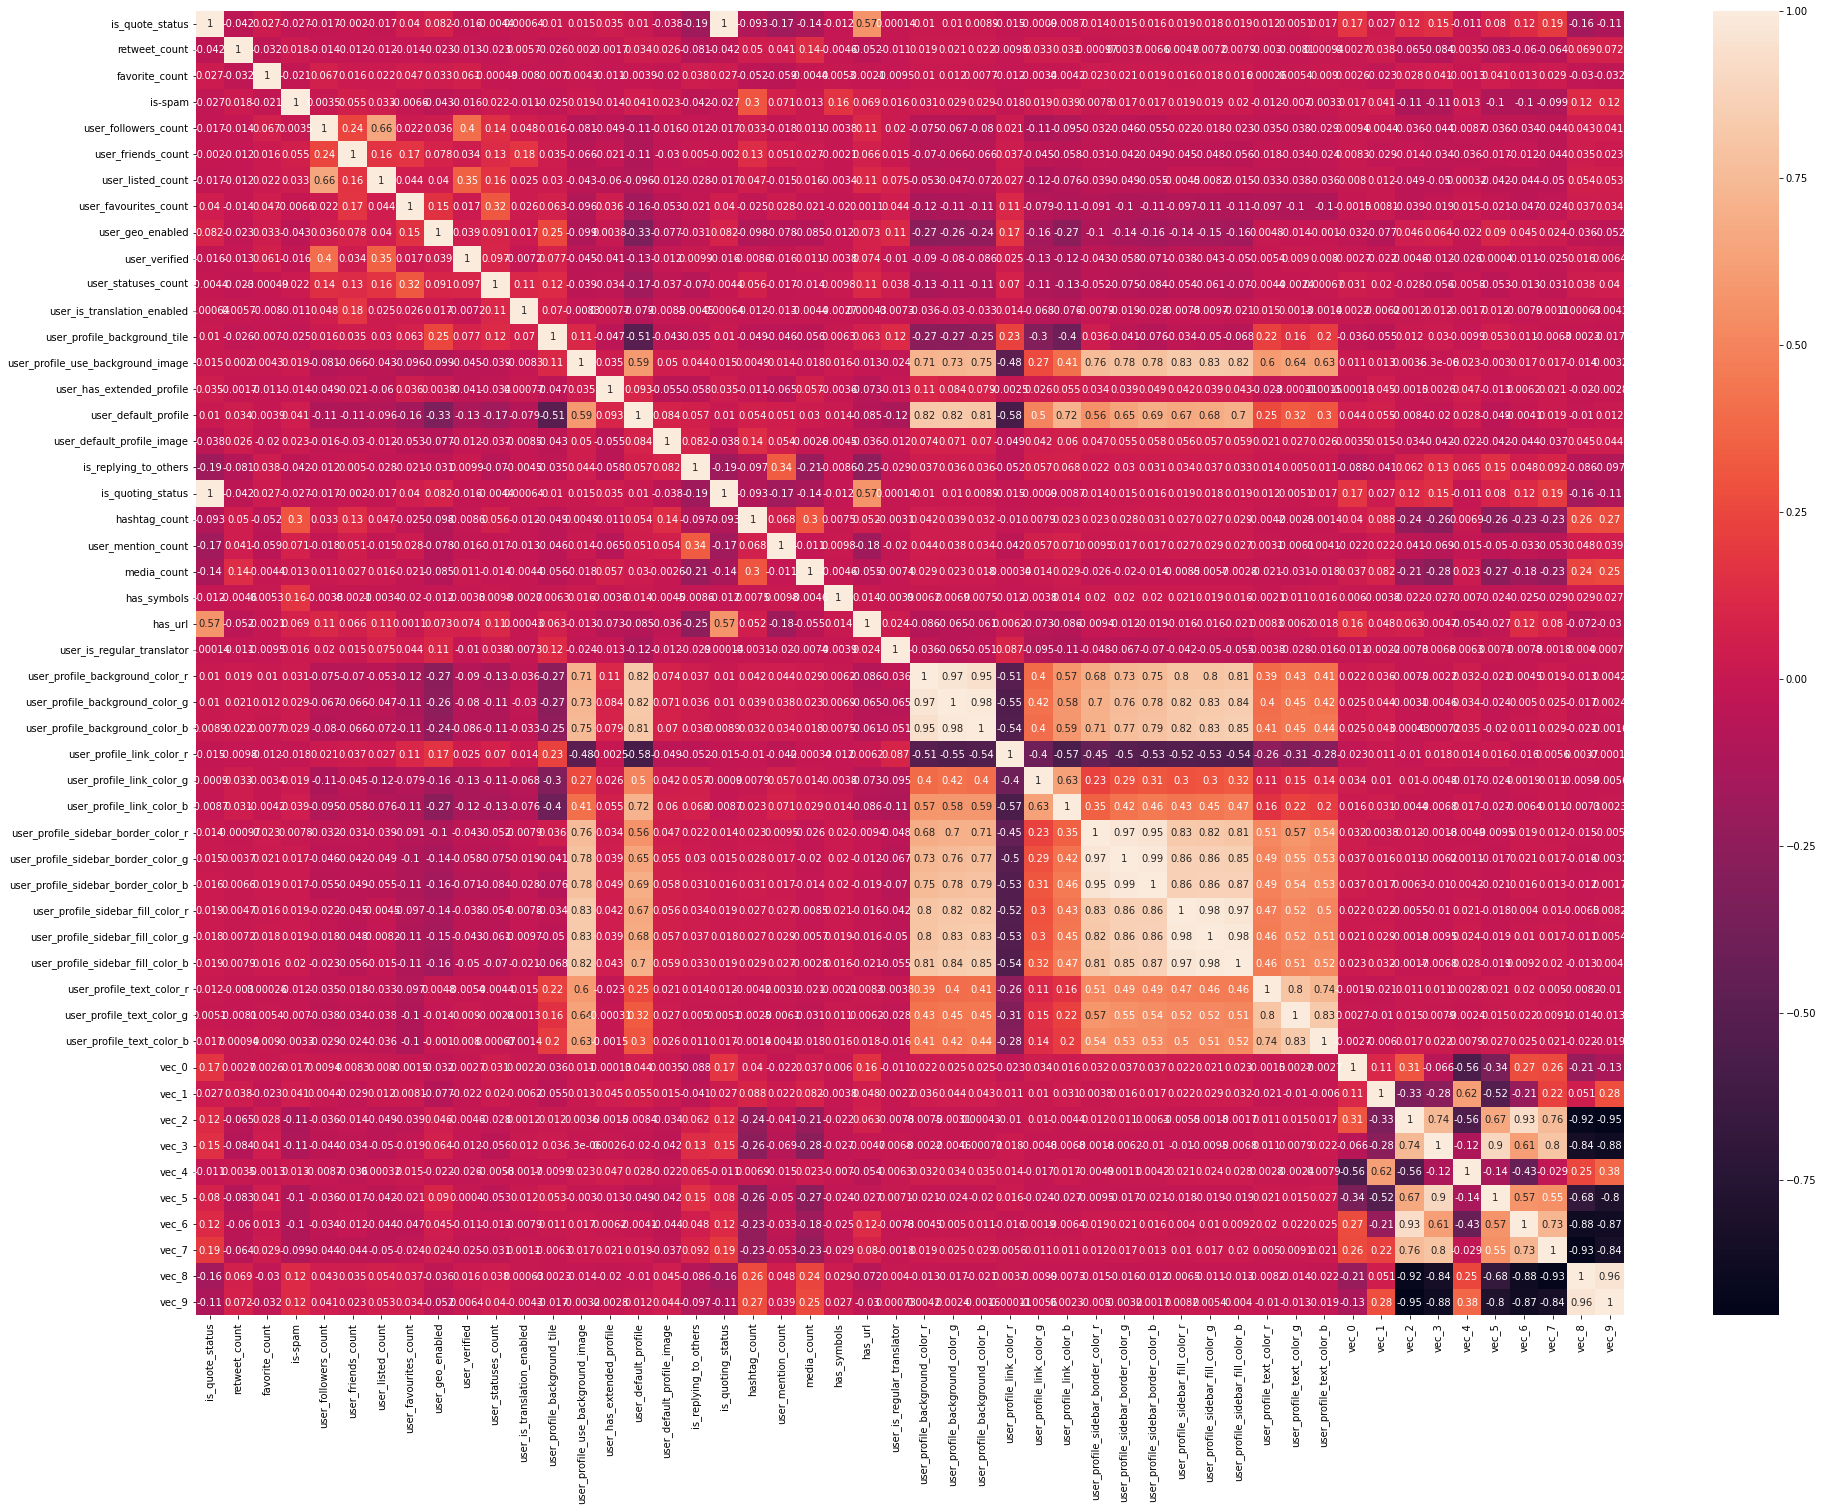

In [404]:
plt.figure(figsize=(32,24))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [406]:
numeric_df.to_csv('../dataset/numeric-dataset-vectorised.csv')

In [414]:
tweet_df.to_json('../dataset/tweet-vectorised.json', orient='index')
tweet_df.to_excel('../dataset/tweet-vectorised.xlsx')

In [413]:
# Revisit: sklearn feature selector
predictors = numeric_df.drop('is-spam', axis=1)
target = numeric_df['is-spam']

tree_classifier = ExtraTreesClassifier(n_estimators=50)
tree_classifier = tree_classifier.fit(predictors, target)

feature_importance_df = pd.DataFrame({
    'feature': predictors.columns,
    'importance': tree_classifier.feature_importances_
})

# best_features = feature_importance_df.nlargest(45, 'importance')
# best_features.drop(29, inplace=True)
# best_features

feature_importance_df.sort_values('importance', ascending=False)

,feature,importance
18,hashtag_count,0.110749
4,user_friends_count,0.046810
3,user_followers_count,0.044153
48,vec_9,0.042307
19,user_mention_count,0.041289
45,vec_6,0.041071
1,retweet_count,0.040800
42,vec_3,0.040664
41,vec_2,0.039252
39,vec_0,0.038605
